# Loan Approval Prediction

The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, tenure, cibil score, education, assests and many other variables. Thorugh this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

### About the dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

### Data Dictionary
| Variable | Description |
| --- | --- |
|loan_id | Unique loan ID|
|no_of_dependents | Number of dependents of the applicant|
|education | Education level of the applicant|
|self_employed | If the applicant is self-employed or not|
|income_annum | Annual income of the applicant|
|loan_amount | Loan amount requested by the applicant|
|loan_tenure | Tenure of the loan requested by the applicant (in Years)|
|cibil_score | CIBIL score of the applicant|
|residential_asset_value | Value of the residential asset of the applicant|
|commercial_asset_value | Value of the commercial asset of the applicant|
|luxury_asset_value | Value of the luxury asset of the applicant|
|bank_assets_value | Value of the bank asset of the applicant|
|loan_status | Status of the loan (Approved/Rejected)|

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


# Data Preprocessing

In [6]:
df.shape

(4269, 13)

In [7]:
df.drop(columns='loan_id', inplace=True)

In [8]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [9]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,19900000,8900000


In [10]:
# Drop unnecessay columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000


## Descriptive Statistics

In [12]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


## Exploratory Data Analysis (EDA)

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

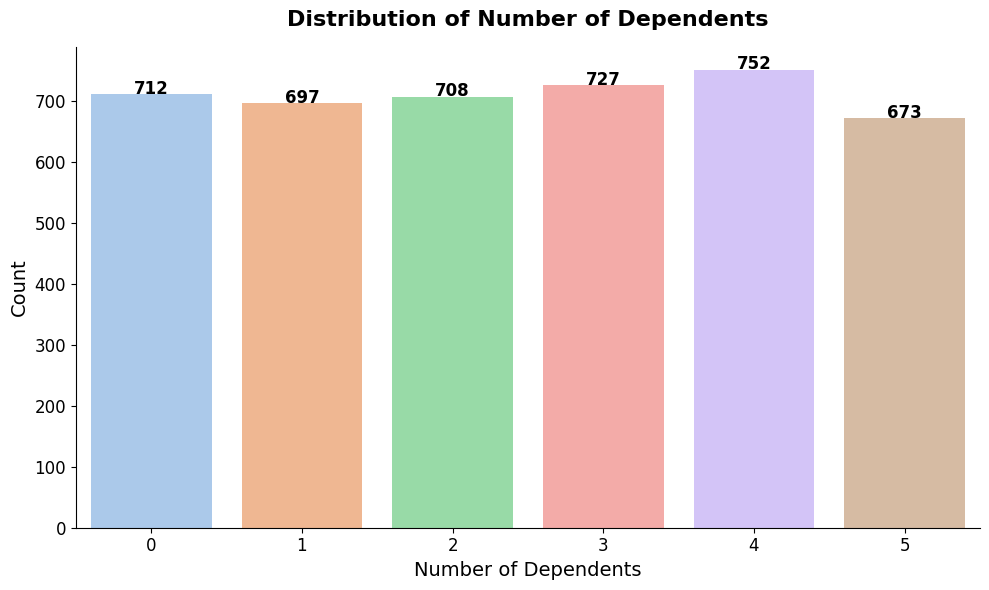

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=' no_of_dependents', data=df, palette='pastel')

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, f'{int(height)}', 
            ha='center', fontsize=12, fontweight='bold', color='black')

ax.set_title('Distribution of Number of Dependents', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Number of Dependents', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

This graph shows the number of dependent indivduals on the loan applicant. There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

## Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

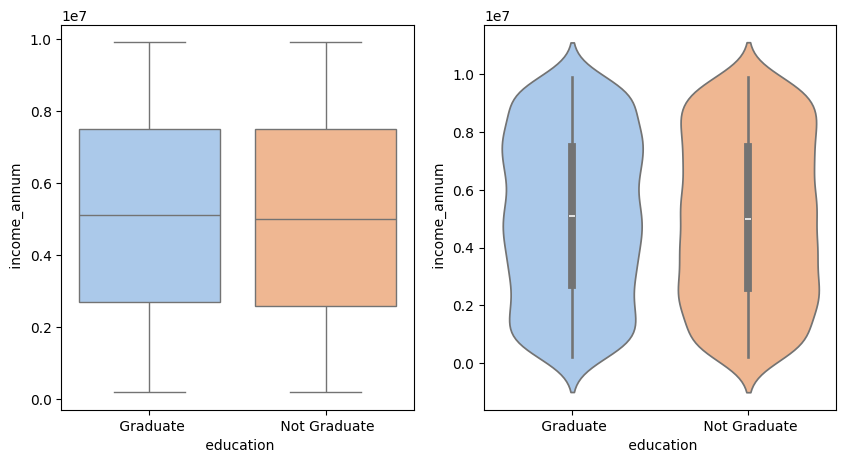

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0], palette='pastel')
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1], palette='pastel')

These two graphs - boxplot and violinplot visualizes the education of applicants along with their annual income. The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

## Employment Status and Education

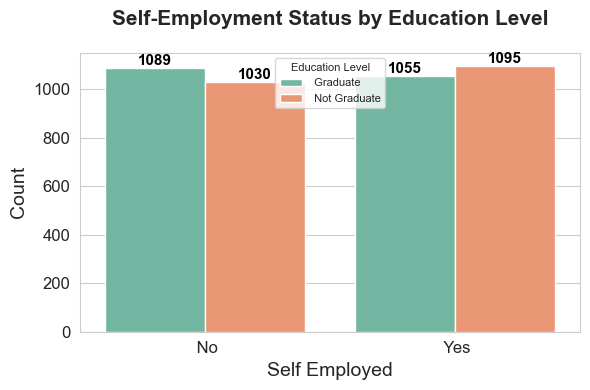

In [21]:
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")


bar = sns.countplot(
    x=' self_employed',
    hue=' education',
    data=df,
    palette='Set2'
)

# Add count labels on bars
for p in bar.patches:
    height = int(p.get_height())
    if height > 0:
        bar.annotate(f'{height}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=11, fontweight='bold', color='black')

# Title and axis labels
plt.title('Self-Employment Status by Education Level', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Education Level', title_fontsize=8, fontsize=8, loc="upper center")

plt.tight_layout()
plt.show()

This graph shows the number of self employed applicants along with their education. From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed. This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable. But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. This is a very important factor to consider while predicting the loan approval.

## Loan Amount and Tenure

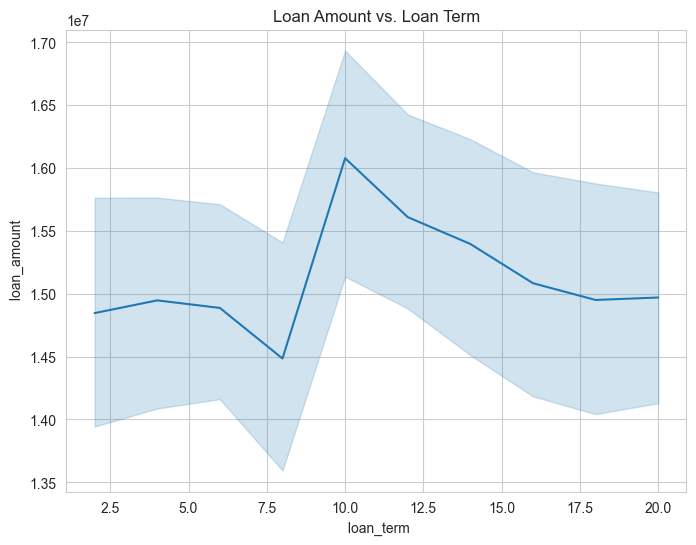

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df)
plt.title('Loan Amount vs. Loan Term')
plt.show()

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount  is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years. 

## CIBIL Score Distribution

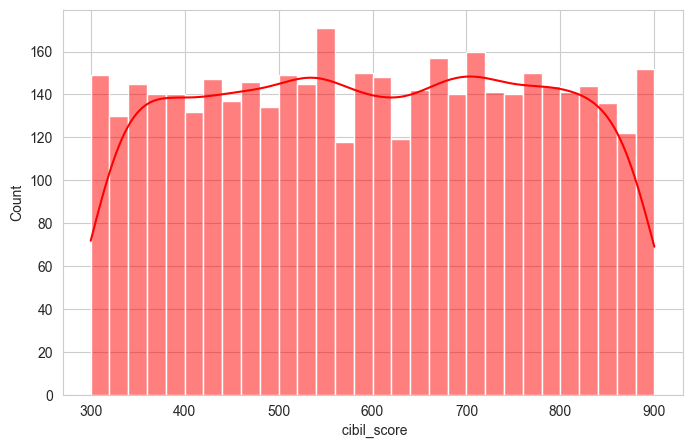

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')
plt.show()

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

Taking the above table as a reference for the cibil score quality, majority of the customers have cibil score below 649, which affects their loan application. However there are many applicants with cibil score above 649, which is a good sign for the bank. The bank can target these customers and provide them with priority services. The bank can also provide them with special offers and discounts to attract them to take loans from the bank. From this, I build a hypothesis that the customers with cibil score above 649 are more likely to get their loan approved.

## Asset Distribution

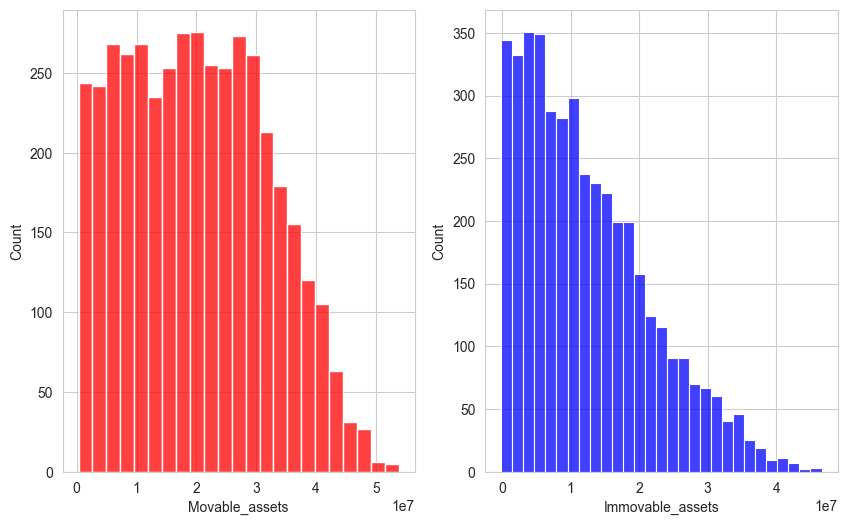

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.show()

Assets play a major role in loan application. They provides a security to the bank that the person will repay the loan. Looking at the assets, as eralier mentionedI have categorized them in movable and immovable assets. The above graphs shows the distribution of movable and immovable assets in the dataset.

Looking at the movable assets which include bank assets and luxury assets, majority of the applicants have less than 30 million and there is a slight trend of decreasing number of applicants as the movable assets increases. Coming to the immovable assets, which include residential assets and commercial assets, majority of the applicants have less than 15 million of immovable assets and there is a strong trend of decreasing number of applicants as the immovable assets increases after 20 million.

## Number of Dependants Vs Loan Status

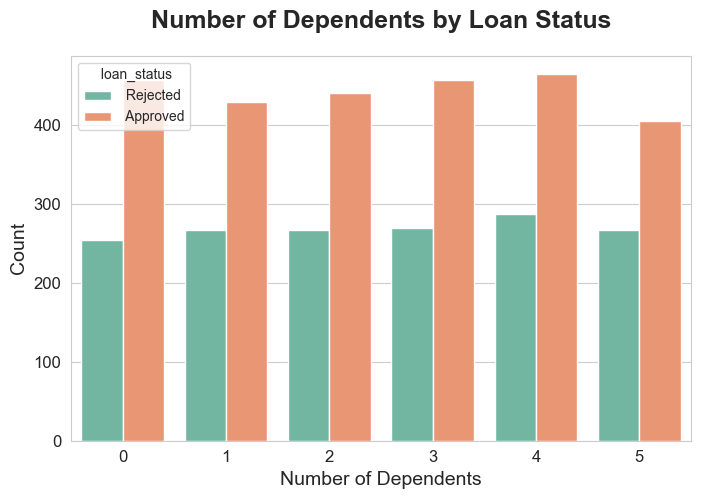

In [34]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status', palette='Set2')
plt.title('Number of Dependents by Loan Status', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Dependents', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents. But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis. But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

## Education Vs Loan Status

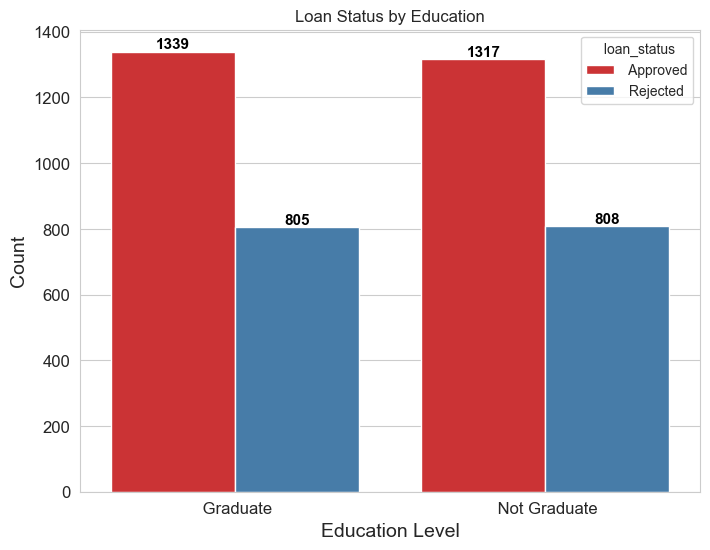

In [37]:
plt.figure(figsize=(8, 6))
bar = sns.countplot(x = ' education', hue = ' loan_status', data = df, palette='Set1')

for p in bar.patches:
    height = int(p.get_height())
    if height > 0:
        bar.annotate(f'{height}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=11, fontweight='bold', color='black')

# Title and axis labels
plt.title('Loan Status by Education', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Rotate x labels if long
plt.yticks(fontsize=12)
plt.title('Loan Status by Education')
plt.show()

## Annual Income vs Loan Status

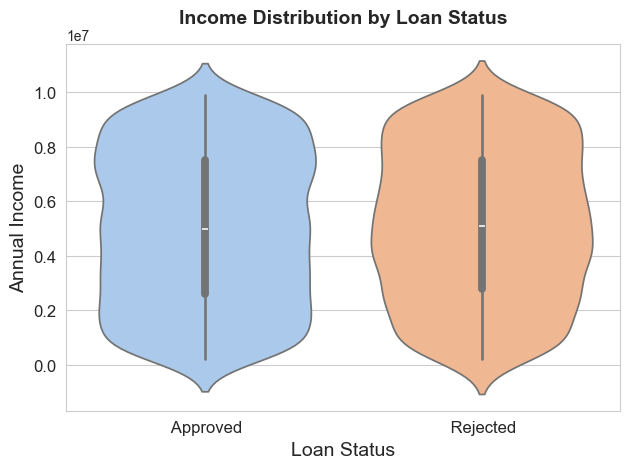

In [39]:
sns.set_style("whitegrid")

# Violin plot with palette for nicer colors
sns.violinplot(x=' loan_status', y=' income_annum', data=df, palette='pastel')

plt.title('Income Distribution by Loan Status', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Annual Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

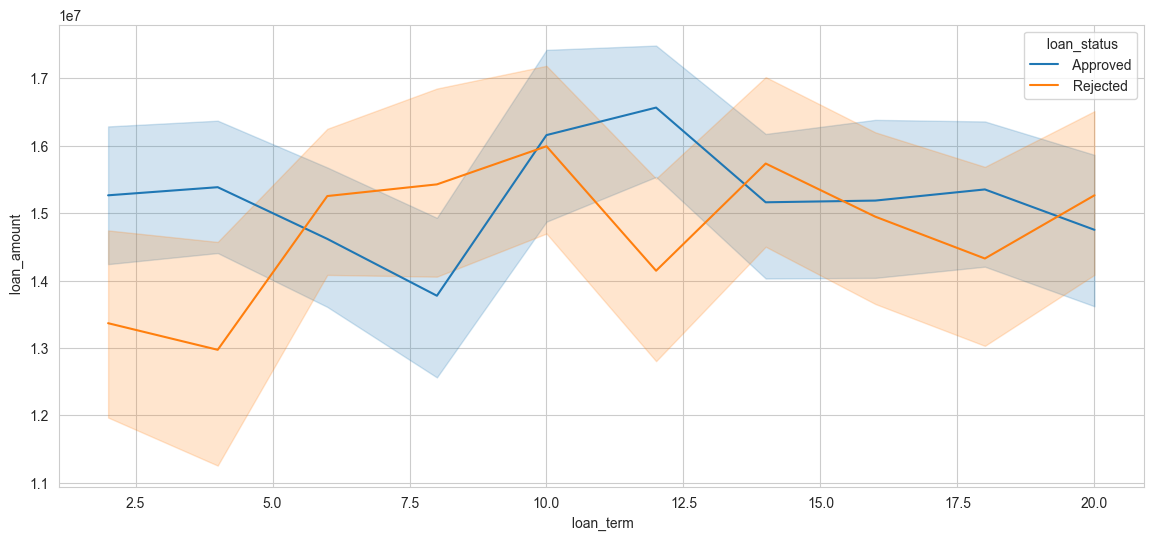

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

## CIBIL Score vs Loan Status

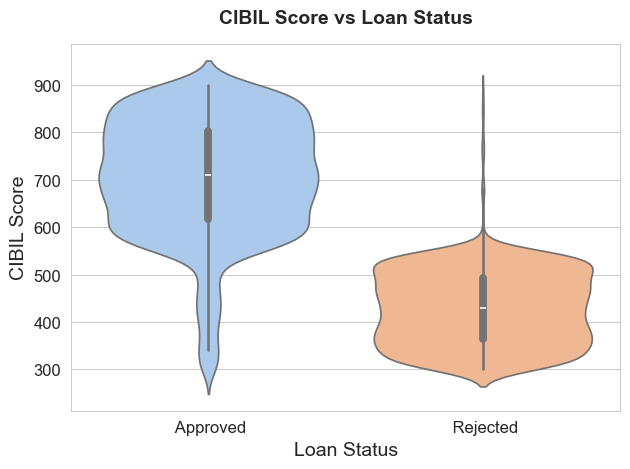

In [44]:
sns.set_style("whitegrid")

sns.violinplot(x=' loan_status', y=' cibil_score', data=df, palette='pastel')
plt.title('CIBIL Score vs Loan Status', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('CIBIL Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

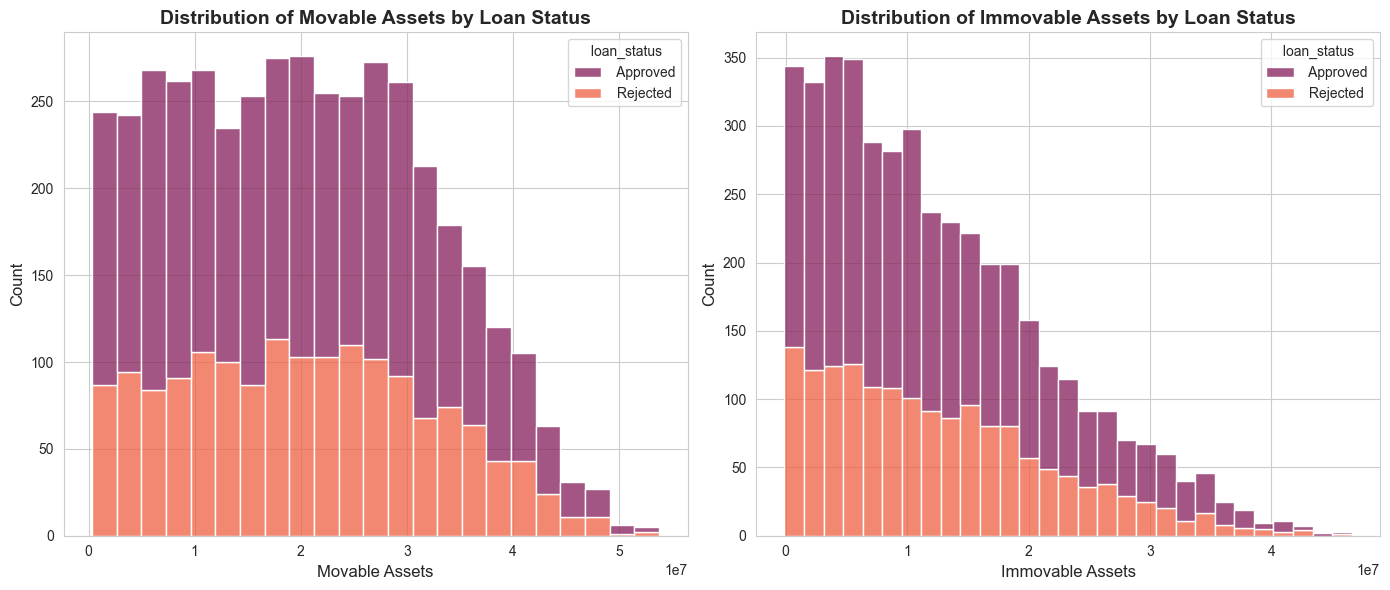

In [46]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Movable assets distribution
sns.histplot(
    x='Movable_assets', 
    data=df, 
    hue=' loan_status',
    multiple='stack', 
    palette='rocket', 
    ax=ax[0]
)
ax[0].set_title('Distribution of Movable Assets by Loan Status', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Movable Assets', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Immovable assets distribution
sns.histplot(
    x='Immovable_assets', 
    data=df, 
    hue=' loan_status',
    multiple='stack', 
    palette='rocket', 
    ax=ax[1]
)
ax[1].set_title('Distribution of Immovable Assets by Loan Status', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Immovable Assets', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

# Data Preprocessing 2

### Label Encoding and Categorical Variables

In [50]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [51]:
df.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000
5,0,1,1,4800000,13500000,10,319,0,18800000,15100000
6,5,1,0,8700000,33000000,4,678,1,33500000,37300000
7,2,1,1,5700000,15000000,20,382,0,17800000,18900000
8,0,1,1,800000,2200000,20,782,1,3400000,2100000
9,5,0,0,1100000,4300000,10,388,0,4900000,4600000


## Correlation Matrix Heatmap

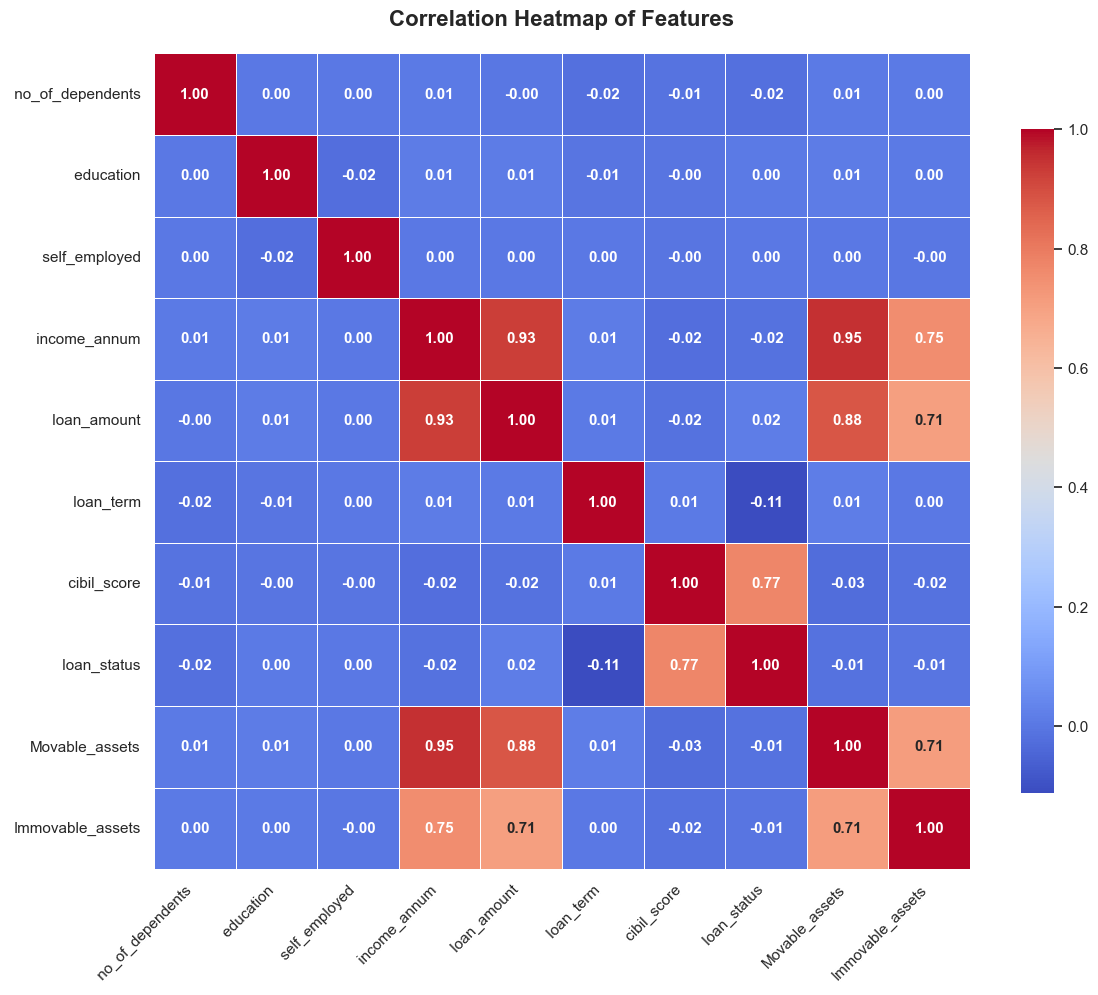

In [53]:
plt.figure(figsize=(12, 10))
sns.set(style="white")
heatmap = sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 11, "weight": "bold"}
)


plt.title("Correlation Heatmap of Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=11, rotation=45, ha='right')
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

This coorelation matrix heatmap has the folowing strong correlations:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income and Movables and Immovale assets. The person with greater income will have greater assets.

Now, I will be exploring the coorleation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

## Asset vs Loan Amount

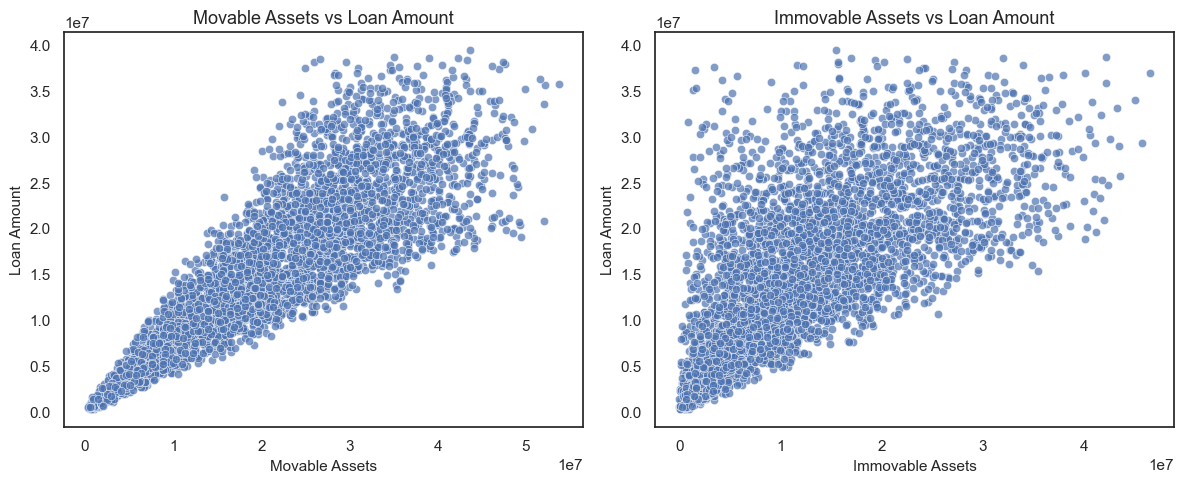

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movable Assets vs Loan Amount
sns.scatterplot(
    x='Movable_assets',
    y=' loan_amount',
    data=df,
    ax=ax[0],
    alpha=0.7
)
ax[0].set_title('Movable Assets vs Loan Amount', fontsize=13)
ax[0].set_xlabel('Movable Assets', fontsize=11)
ax[0].set_ylabel('Loan Amount', fontsize=11)

# Immovable Assets vs Loan Amount
sns.scatterplot(
    x='Immovable_assets',
    y=' loan_amount',
    data=df,
    ax=ax[1],
    alpha=0.7
)
ax[1].set_title('Immovable Assets vs Loan Amount', fontsize=13)
ax[1].set_xlabel('Immovable Assets', fontsize=11)
ax[1].set_ylabel('Loan Amount', fontsize=11)

plt.tight_layout()
plt.show()

## Loan VS Income Amount

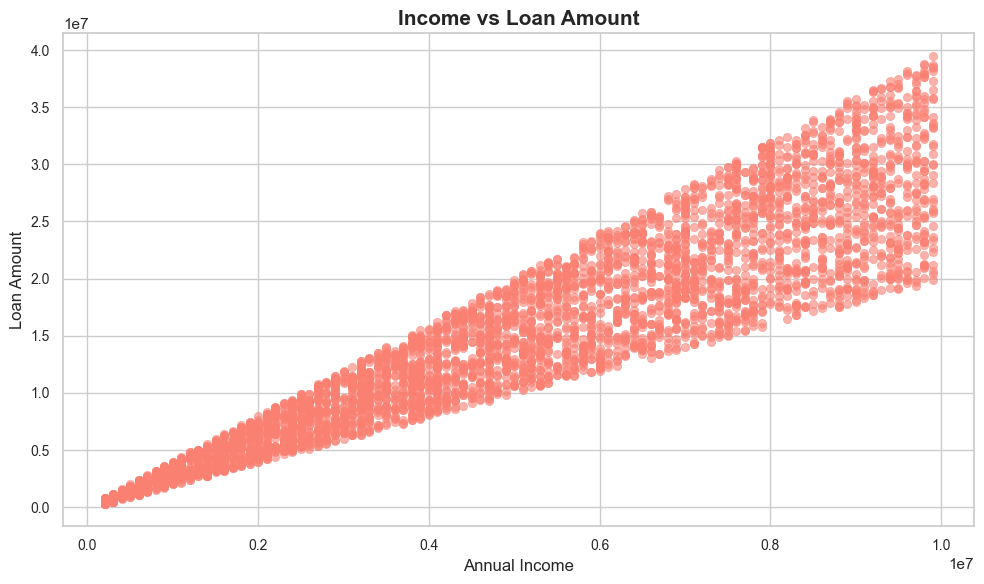

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=' income_annum',
    y=' loan_amount',
    data=df,
    color='salmon',
    alpha=0.6,
    edgecolor=None
)
plt.title('Income vs Loan Amount', fontsize=15, fontweight='bold')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

## Train Test Split

In [62]:
df.columns = df.columns.str.strip()

In [63]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

I will be using the following machine learning models to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier

In [66]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

print(dtree.score(X_train, y_train))

1.0


In [67]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)

<class 'pandas.core.frame.DataFrame'> (3415, 9)
<class 'pandas.core.series.Series'> (3415,)


In [68]:
# Predicting the Loan Approval Status
y_dtree_pred = dtree.predict(X_test)

## Random Forest Classifier

In [70]:
rfc = RandomForestClassifier()

In [71]:
# Training the model using the training data
rfc.fit(X_train, y_train)

# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [72]:
y_rfc_pred = rfc.predict(X_test)

In [73]:
print(type(y_dtree_pred), y_dtree_pred.shape)

<class 'numpy.ndarray'> (854,)


# Model Evaluation

## Confusion Matrix

Text(514.9772727272726, 0.5, 'Actual')

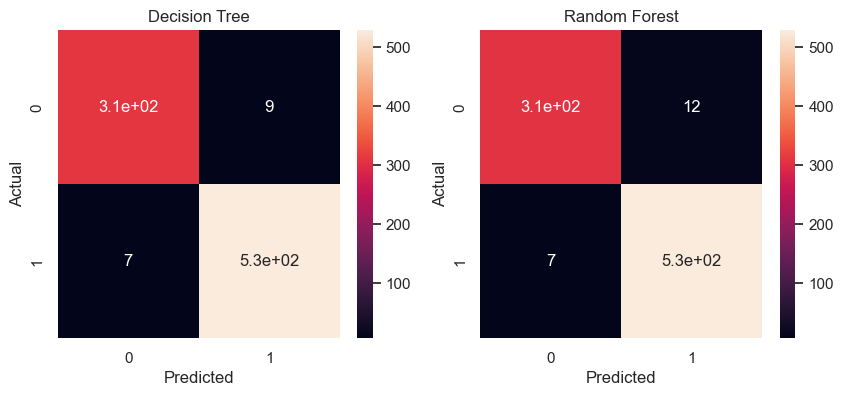

In [76]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

sns.heatmap(confusion_matrix(y_test, y_dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The above confusion matrix heatmap visualizes the the true positive and true negative value counts in both the machine learning models. The decision tree classfier has only 17 false positve and negative valyes where has random forest classifier has 21 false postive and negative values. The decision tree classifier has a better accuracy compared to random forest classifier.

## Distribution Plot

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

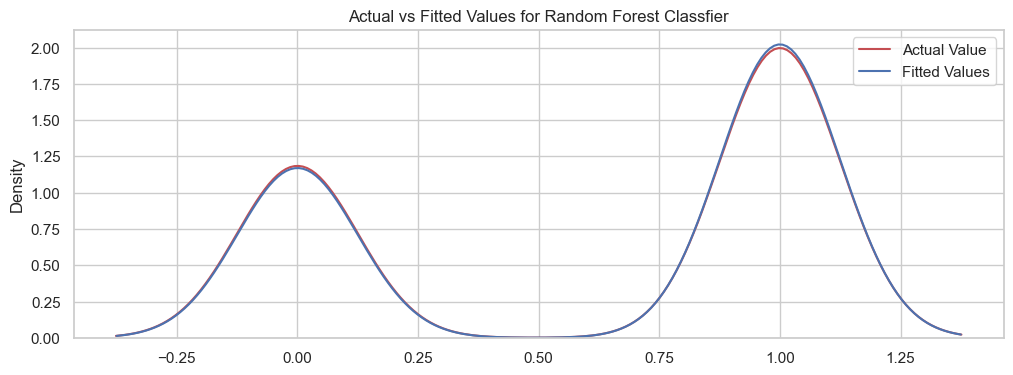

In [79]:
plt.figure(figsize=(12, 4))
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = y_rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.legend()
plt.title('Actual vs Fitted Values for Random Forest Classfier')

Text(0.5, 1.0, 'Actual vs Fitted Values for Decision Tree Classfier')

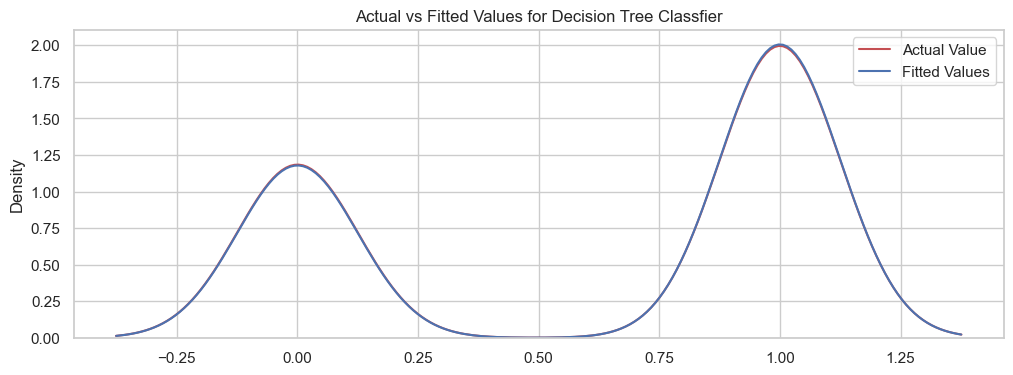

In [80]:
plt.figure(figsize=(12, 4))
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = y_dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.legend()
plt.title('Actual vs Fitted Values for Decision Tree Classfier')

The distribution plot of both the models are almost same. There is very minute difference in the distribution density of the predicted and actual values in the random forest classifer. However, in case of decision tree classifier, the distribution density of the predicted values clearly overlaps with the actual values. Hence, we can say that the decision tree classifier is a better model than the random forest classifier for this dataset.

## Classification Report

In [83]:
print(classification_report(y_test, y_dtree_pred))
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [84]:
print("Decision Tree Classifier: ")
print('R2 score: ', r2_score(y_test, y_dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_dtree_pred))
print('\n')

print("Random Forest Classifier: ")
print('R2 score: ', r2_score(y_test, y_rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_rfc_pred))

Decision Tree Classifier: 
R2 score:  0.9198347883225382
Mean Squared Error:  0.01873536299765808
Mean Absolute Error:  0.01873536299765808


Random Forest Classifier: 
R2 score:  0.9048038111330141
Mean Squared Error:  0.02224824355971897
Mean Absolute Error:  0.02224824355971897


From all the above metrics, graphs and reports, I conclude that descision tree classifier is a better machine learning model to predict the loan approval status of a person.

# Conclusion

From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:
- CIBIL Score: People with higher CIBIL score have higher chances of loan approval
- Number of Dependents: People with more number of dependents have less chances of loan approval
- Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
- Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval

Coming to the machine learning models, I have used Decision Tree Classifier and Random Forest Classifier. Both the models have given excellent results having accuracies - 91.4 % and 89.4 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.